# Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# reading the data of provided file
housing=pd.read_csv('housing.csv')

In [3]:
# now to take look on data how it looks
housing.head()

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.00
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.01
2,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.02
3,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.03
4,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.04


In [4]:
# to check every contains equal no of entries which tells us that there is no missing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    int64  
 2   INDUS    507 non-null    float64
 3   CHEAS    507 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    int64  
 9   TAX      507 non-null    int64  
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.6 KB


In [5]:
housing['CHEAS'].value_counts()

0    507
Name: CHEAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.070000e+02,507.0,507.00,507.0,507.000,5.070000e+02,5.070000e+02,5.070000e+02,507.0,507.0,5.070000e+02,507.0,5.070000e+02,507.000000
mean,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.340870
std,2.604655e-18,0.0,0.00,0.0,0.000,8.890556e-16,1.422489e-14,8.890556e-16,0.0,0.0,1.778111e-15,0.0,8.890556e-16,0.182809
min,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.000000
25%,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.205500
50%,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.320000
75%,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.435500
max,6.320000e-03,18.0,2.31,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,1.530000e+01,396.9,4.980000e+00,24.990000


In [7]:
import matplotlib.pyplot as plt

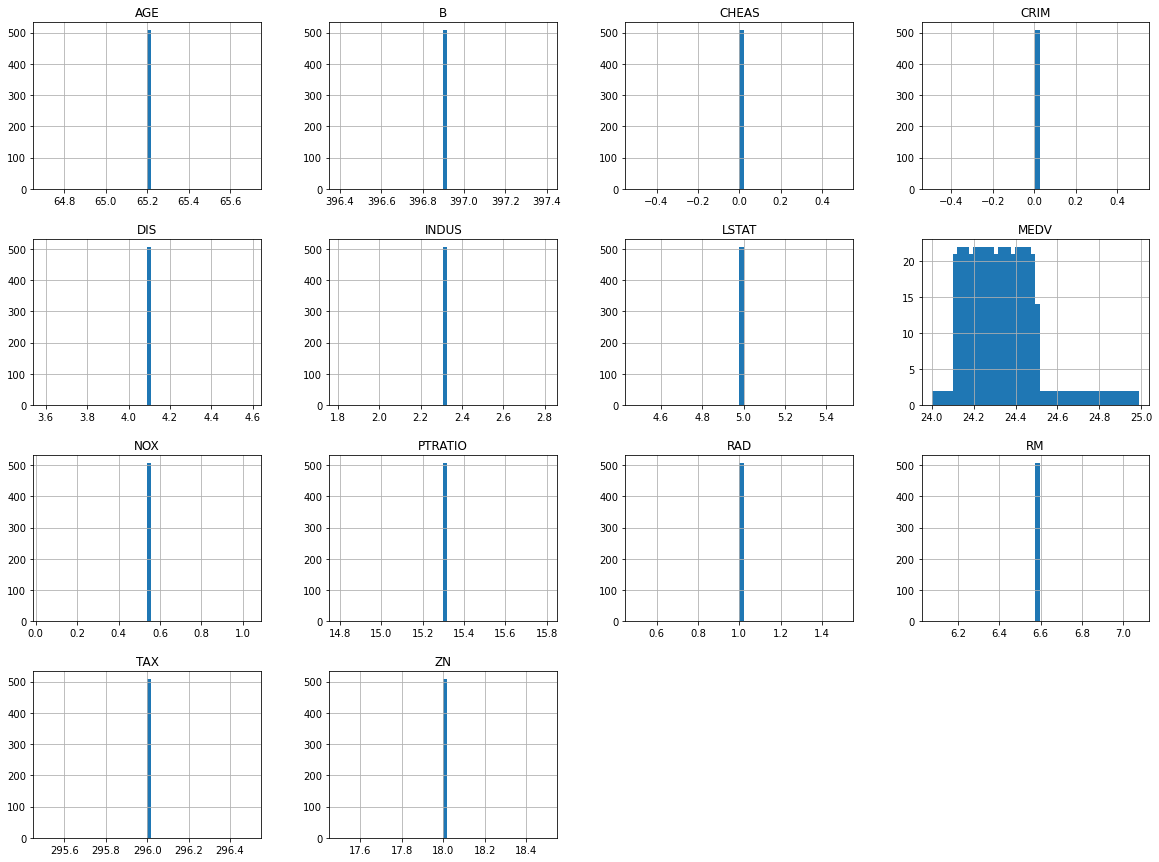

In [8]:
housing.hist(bins=50 , figsize=(20,15))
plt.show()


## Train-test splitting

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [10]:
print(f"Rows in train set: {len(train_set)}\nRows in test set :{len(test_set)}\n")

Rows in train set: 405
Rows in test set :102



In [11]:
# this will make sure us that our splitting is done properly i.e every import elment is presentin  every dataset  test and train 
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index,test_index in split.split(housing, housing["CHEAS"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
# the data present in test set
strat_test_set

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
241,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.241
463,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.463
205,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.205
71,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.710
503,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.130
350,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.350
339,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.339
99,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.990


In [13]:
# this will give us relationship between the test data set
strat_test_set.describe()

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,1.020000e+02,102.0,1.020000e+02,102.0,1.020000e+02,1.020000e+02,102.0,102.00,102.0,102.0,1.020000e+02,1.020000e+02,1.020000e+02,102.000000
mean,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.352549
std,8.716450e-19,0.0,4.462823e-16,0.0,1.115706e-16,4.462823e-15,0.0,0.00,0.0,0.0,1.785129e-15,1.142483e-13,1.785129e-15,0.179720
min,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.010000
25%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.214750
50%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.334500
75%,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.458750
max,6.320000e-03,18.0,2.310000e+00,0.0,5.380000e-01,6.575000e+00,65.2,4.09,1.0,296.0,1.530000e+01,3.969000e+02,4.980000e+00,24.990000


In [14]:
# provide information regaurding test set
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 241 to 348
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    int64  
 2   INDUS    102 non-null    float64
 3   CHEAS    102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 12.0 KB


In [15]:
# now to see the values present in test data set and train data set of column CHEAS
strat_test_set['CHEAS'].value_counts()

0    102
Name: CHEAS, dtype: int64

In [16]:
strat_train_set['CHEAS'].value_counts()

0    405
Name: CHEAS, dtype: int64

In [17]:
housing=strat_train_set.copy()

## Looking for Correlations

In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000e+00
CRIM       1.289203e-13
PTRATIO    1.289150e-13
AGE        1.289135e-13
NOX        1.289118e-13
LSTAT      1.289050e-13
DIS       -1.289135e-13
RM        -1.289286e-13
B         -1.289342e-13
INDUS     -1.289342e-13
ZN                  NaN
CHEAS               NaN
RAD                 NaN
TAX                 NaN
Name: MEDV, dtype: float64

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 6.575 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 18.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 4.98 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 6.575 results in singular transformations; automatic

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

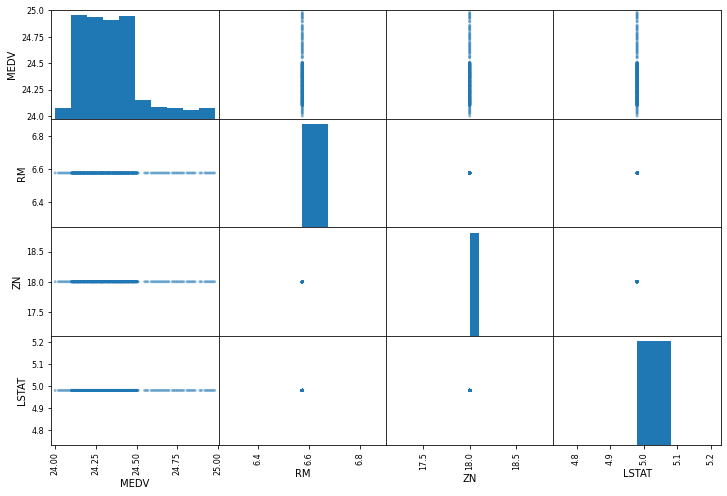

In [20]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

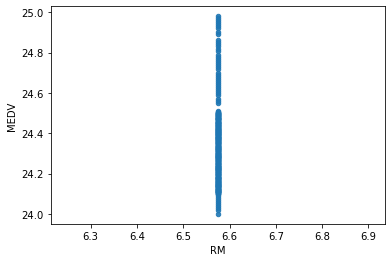

In [21]:
housing.plot(kind='scatter',x='RM',y='MEDV', alpha=.9)

### Trying out attribute combinations

In [22]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [23]:
housing['TAXRM']

186    45.019011
221    45.019011
467    45.019011
398    45.019011
73     45.019011
         ...    
474    45.019011
72     45.019011
367    45.019011
198    45.019011
132    45.019011
Name: TAXRM, Length: 405, dtype: float64

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
186,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.186,45.019011
221,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.221,45.019011
467,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.467,45.019011
398,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.398,45.019011
73,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.730,45.019011


In [25]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000e+00
CRIM       1.289203e-13
PTRATIO    1.289150e-13
AGE        1.289135e-13
NOX        1.289118e-13
LSTAT      1.289050e-13
TAXRM     -1.289135e-13
DIS       -1.289135e-13
RM        -1.289286e-13
B         -1.289342e-13
INDUS     -1.289342e-13
ZN                  NaN
CHEAS               NaN
RAD                 NaN
TAX                 NaN
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

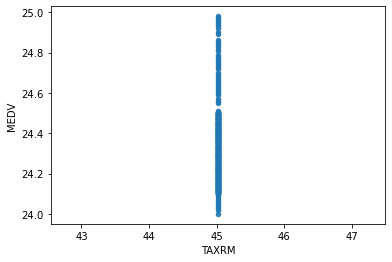

In [26]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV', alpha=.9)

In [27]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

To take care of mising attribute you have three options:
 1. Get rid of missing data points
 2. Get rid of whole attribute
 3. Set the missing value to some value (0,mean,median)

In [28]:
a=housing.dropna(subset=['RM']) # option 1
a.shape

(405, 13)

In [29]:
housing.drop("RM",axis=1).shape # option 2

(405, 12)

In [30]:
median=housing['RM'].median()# computing median for option 3

In [31]:
housing['RM'].fillna(median)
# note that original dataset will remain unchanged

186    6.575
221    6.575
467    6.575
398    6.575
73     6.575
       ...  
474    6.575
72     6.575
367    6.575
198    6.575
132    6.575
Name: RM, Length: 405, dtype: float64

In [32]:
housing.shape

(405, 13)

In [33]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [35]:
x= imputer.transform(housing)

In [36]:
housing_tr= pd.DataFrame(x, columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHEAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.050000e+02,405.0,4.050000e+02,405.0,405.000,4.050000e+02,4.050000e+02,4.050000e+02,405.0,405.0,405.0,405.0,4.050000e+02
mean,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00
std,8.684345e-19,0.0,4.446385e-16,0.0,0.000,1.778554e-15,1.422843e-14,8.892770e-16,0.0,0.0,0.0,0.0,1.778554e-15
min,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00
25%,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00
50%,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00
75%,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00
max,6.320000e-03,18.0,2.310000e+00,0.0,0.538,6.575000e+00,6.520000e+01,4.090000e+00,1.0,296.0,15.3,396.9,4.980000e+00


## Skit-Learn Design

primarily three types of objects
1. Estimators- it estimate some parameters based on a dataset eg.imputer.It has fit method and transform method fit method fit datset
   and calculate internal parameter
2. Transformers-this method takes input and returns output based on learnings from fit().it has convinience function called fit_transform
   which fits and then transform
3. Predictors-linearRegression is a example of  predictor model. fit() and predict() are the two common functions.it gives score funtion which will evaluate          predictions

## Feature scaling

Primarily two types of feature scaling methods:
1. Min-Max scaling (normalization)
   (value-min)/(max-min)
   sklearn provides class for this called MinMaxScaler
2. standardization
   (value-min)/std
   sklearn provides class for this called standardScaler
  

## Creating Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),("std_scaler", StandardScaler())
])

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr

array([[-1.,  0.,  1., ...,  0.,  0., -1.],
       [-1.,  0.,  1., ...,  0.,  0., -1.],
       [-1.,  0.,  1., ...,  0.,  0., -1.],
       ...,
       [-1.,  0.,  1., ...,  0.,  0., -1.],
       [-1.,  0.,  1., ...,  0.,  0., -1.],
       [-1.,  0.,  1., ...,  0.,  0., -1.]])

In [41]:
housing_num_tr.shape

(405, 13)

## Selecting a desired model for Dragon real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model = DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
some_data= housing.iloc[:5]


In [44]:
some_labels= housing_labels.iloc[:5]

In [45]:
prepared_data= my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([24.33968099, 24.33968099, 24.33968099, 24.33968099, 24.33968099])

In [47]:
list(some_labels)

[24.186, 24.221, 24.467, 24.398000000000003, 24.73]

## evaluating the model

In [48]:
from sklearn.metrics import mean_squared_error
hpusing_predictions=model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels,hpusing_predictions)
rmse =np.sqrt(mse)

In [49]:
mse

0.03365837262636793

## using better evaluation technique - cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error',cv=20)
rmse_scores=np.sqrt(-scores)

In [51]:
rmse_scores

array([0.15556777, 0.26075259, 0.23541314, 0.1384145 , 0.19967429,
       0.13840137, 0.13520003, 0.21987228, 0.27239099, 0.14875728,
       0.16049931, 0.19049073, 0.1473941 , 0.10536979, 0.21991295,
       0.1236671 , 0.12749179, 0.19113429, 0.19724392, 0.19698563])

In [52]:
def print_scores(scores):
    print('scores:',scores)
    print('Mean:',scores.mean())
    print("Standard deviation:" ,scores.std())

In [53]:
print_scores(rmse_scores)

scores: [0.15556777 0.26075259 0.23541314 0.1384145  0.19967429 0.13840137
 0.13520003 0.21987228 0.27239099 0.14875728 0.16049931 0.19049073
 0.1473941  0.10536979 0.21991295 0.1236671  0.12749179 0.19113429
 0.19724392 0.19698563]
Mean: 0.17823169245044404
Standard deviation: 0.04606432522516522


## saving model

In [54]:
from sklearn.externals import joblib
joblib.dump(model, 'Dragon_model.pkl') 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/externals/joblib/nump

['Dragon_model.pkl']

## testing model

In [55]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(y_test))

[24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099 24.33968099
 24.33968099 24.33968099 24.33968099 24.33968099 24

In [56]:
final_rmse

0.17929882636970199